## Case Study 1 - Statistics for Data Science and Data Analytics

In [40]:
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_data = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data
df_data.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


In [8]:
# Follow the class lecture from here onwards and to complete the case study, write the code as discussed in the class
df_gender = df_data['gender'].value_counts()
df_gender

male      481
female    453
Name: gender, dtype: int64

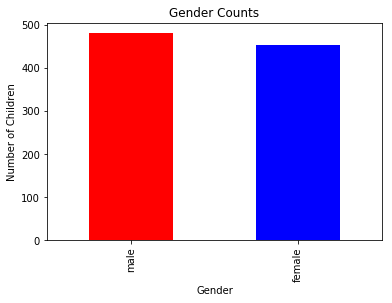

In [12]:
df_gender.plot(kind='bar',title="Gender Counts",color=['Red','Blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()

In [19]:
per = df_gender/ df_data.shape[0]*100
per

male      51.498929
female    48.501071
Name: gender, dtype: float64

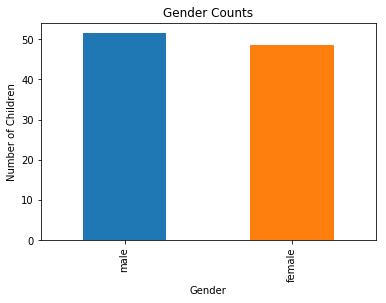

In [20]:
per.plot(kind='bar',title="Gender Counts")
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()

In [22]:
df_family = df_data['family'].value_counts()
df_family

185     15
120     11
066     11
166     11
130     11
136     10
097     10
158     10
140     10
107      9
190      9
016      9
053      9
173      9
124      9
082      9
141      8
099      8
069      8
121      8
168      8
083      8
079      8
161      8
145      8
046      8
136A     8
172      8
176      8
020      8
        ..
150      1
012      1
034      1
160      1
024      1
030      1
200      1
187      1
006      1
080      1
178      1
148      1
157      1
127      1
154      1
059      1
143      1
098      1
065      1
184      1
152      1
009      1
182      1
111      1
063      1
117      1
019      1
139      1
041      1
147      1
Name: family, Length: 205, dtype: int64

In [26]:
df_family = df_data[['family','children']].drop_duplicates()
# sprint(df_family)
df_child  = df_family['children'].value_counts().sort_index()
df_child

1     33
2     23
3     22
4     31
5     28
6     18
7     17
8     17
9      7
10     4
11     4
15     1
Name: children, dtype: int64

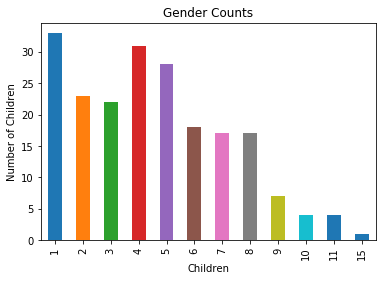

In [28]:
df_child.plot(kind='bar',title="Gender Counts")
plt.xlabel('Children')
plt.ylabel('Number of Children')
plt.show()

In [42]:
df = df_data['father'].unique()
# pd.crosstab(df)

In [51]:
df_father_uniq = df_data[['family','father']].drop_duplicates()
df_father = df_father_uniq['father']
df_father

0      78.5
4      75.5
8      75.0
10     75.0
15     75.0
21     74.0
22     74.0
28     74.0
31     74.5
32     74.0
33     74.0
41     74.0
42     73.0
44     73.0
46     73.0
49     73.0
58     73.0
64     73.0
67     73.2
68     72.7
76     72.0
79     72.0
82     72.0
89     72.0
90     72.0
92     72.0
97     72.0
100    72.0
106    72.5
109    72.0
       ... 
803    66.0
809    66.5
817    66.0
822    66.0
823    66.0
825    66.5
831    66.5
838    66.0
839    66.0
843    66.0
844    66.0
859    65.0
863    65.0
864    65.0
868    65.0
873    65.0
882    65.0
884    65.0
890    65.0
896    65.0
898    65.0
901    65.5
905    65.5
910    64.0
917    64.0
924    64.0
925    64.0
927    63.0
929    62.0
932    62.5
Name: father, Length: 205, dtype: float64

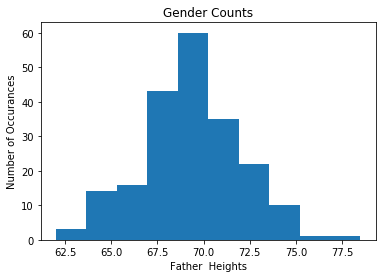

In [52]:
df_father.plot.hist(title="Gender Counts")
plt.xlabel('Father  Heights')
plt.ylabel('Number of Occurances')
plt.show()

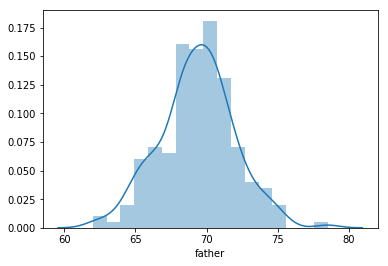

In [53]:
sns.distplot(df_father)

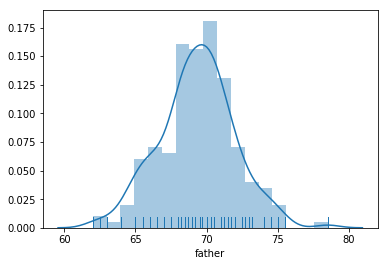

In [54]:
ax = sns.distplot(df_father,rug=True,hist=True)

In [66]:
import numpy as np
np.min(df_father)
np.max(df_father)
np.mean(df_father)
np.median(df_father)
np.std(df_father)
percent_first = np.percentile(df_father,25)
np.percentile(df_father,50)
percent_thrid = np.percentile(df_father,75)
quan = df_father.quantile([0.25,0.50,0.75])
quan
inter_quan =percent_thrid - percent_first
inter_quan

3.0

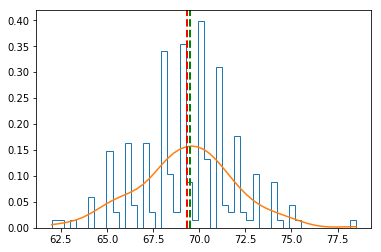

In [74]:
import scipy.stats as stats
density = stats.gaussian_kde(df_father)
n, x, _ = plt.hist(df_father,histtype='step',normed=True,bins=50)
plt.plot(x,density(x))
plt.axvline(np.mean(df_father), linestyle='dashed', color='red', linewidth=2)
plt.axvline(np.median(df_father), linestyle='dashed', color='green', linewidth=2)
plt.show()

# Missing value Imputation

In [78]:
X_missing = df_data.copy()
pd.isnull(X_missing).any()

family             False
father             False
mother             False
midparentHeight    False
children           False
childNum           False
gender             False
childHeight        False
dtype: bool